### Karla Andrea Palma Villanueva (A01754270)

### Adrian Pineda Sánchez (A00834710)

### Kevin Antonio González Díaz (A01338316)

In [1]:
#Copyright 2018 The TensorFlow Authors.

#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Clasificación Básica: Predecir un número

Primero importamos las librerías, como TensorFlow y su módulo keras, que es una interfaz para construir y entrenar los modelos. Descargamos NumPy para operaciones numéricas y manipulación de matrices. Descargamos Matplotlib para la visualización y gráficas de datos, que lo ocuparemos más adelante.

In [1]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


## Importar el set de datos de moda de MNIST

El conjunto de datos MNIST es un conjunto de imágenes de dígitos escritos a mano y stá compuesto por 60,000 imágenes de entrenamiento y 10,000 imágenes de prueba. Cada imagen es en escala de grises y tiene un tamaño de 28x28 píxeles.

Los valores de píxeles son números enteros de 0 a 255, donde 0 representa el color negro (sin intensidad de luz) y 255 representa el color blanco (máxima intensidad de luz). Los valores intermedios entre 0 y 255 representan niveles de gris, donde valores más cercanos a 0 son más oscuros y valores más cercanos a 255 son más claros.

usamos data_mnist= tf.keras.datasets.mnist porque es una API de conjuntos de datos de TensorFlow para cargar el conjunto de datos MNIST. El conjunto de datos MNIST lo dividimos en dos partes, los datos de entrenamiento (train_images, train_labels) y los datos de prueba (test_images, test_labels). Los datos de entrenamiento se utilizan para entrenar el modelo, mientras que los datos de prueba se utilizan para evaluar el rendimiento del modelo después del entrenamiento.

In [2]:
data_mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = data_mnist.load_data()

Las clases en el conjunto de datos MNIST son los dígitos numéricos del 0 al 9. Por lo tanto, hay 10 clases en total. Le damos los nombres a las clases:

In [14]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

## Exploración del set de datos


In [5]:
train_images.shape


(60000, 28, 28)

Lo anterior nos indica que hay 60,000 imagenes en el set de entrenamiento, con cada imagen representada por pixeles de 28x28.

In [6]:
len(train_labels)

60000

Lo anterior nos dice que hay 60,000 etiquetas en el set de entrenamiento.

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Lo anterior nos muestra que las etiquetas son enteros entre 0 y 9

In [8]:
test_images.shape

(10000, 28, 28)

Lo anterior nos dice que hay 10,000 imagenes en el set de pruebas. Otra vez, cada imagen es representada como pixeles de 28x28.

In [9]:
len(test_labels)

10000

Y lo anterior nos muestra que el set de pruebas contiene 10,000 etiquetas de imagen.

## Pre-procesamiento de datos

utilizamos la biblioteca matplotlib para visualizar las dos primeras imágenes del conjunto de datos de entrenamiento. Lo que se hace es una gráfica de los 28x28 pixeles y vemos que en ambas imágenes (gráficas) los más claros son los que representan el número, los amarillos que se acercan a 255. 

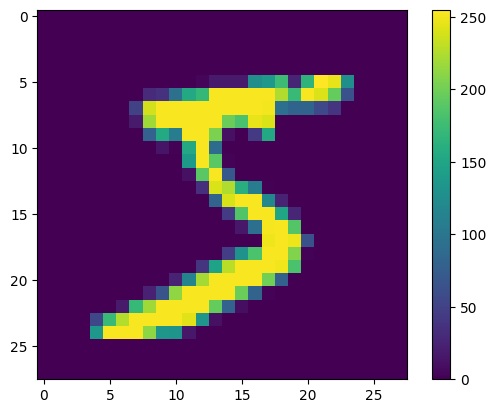

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

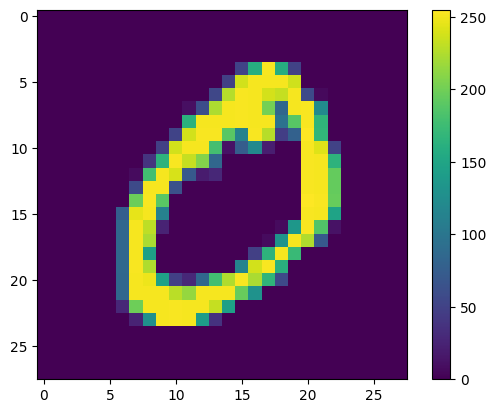

In [11]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Escalamos estos valores en un rango de 0 a 1 antes de alimentarlos al modelo de la red neuronal.

Al dividir los valores de píxeles por 255, se logra que todos los valores estén en el rango de 0 a 1. Este es el rango típicamente utilizado para representar valores normalizados. Además, al mencionar que es importante que tanto el conjunto de entrenamiento como el conjunto de prueba se preprocesen de la misma manera, se asegura que el modelo se entrene y evalúe de manera consistente en ambos conjuntos, lo que contribuye a resultados más confiables y comparables.


In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Ahora vamos a mostrar las primeras 25 imágenes del conjunto de entrenamiento (training set) y etiquetar cada imagen con el nombre de su clase correspondiente obtenido de class_names. Esto es útil para asegurarnos de que los datos estén en el formato adecuado y para entender cómo se ven las imágenes y cómo están distribuidas las clases.

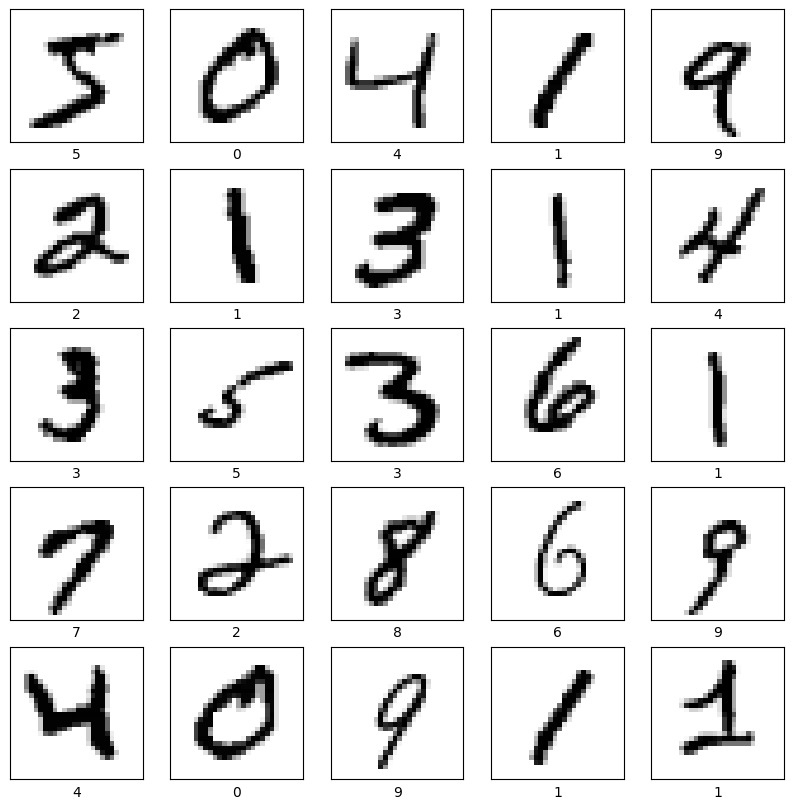

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construir el Modelo

Primero configuramos las capas del modelo y luego compilamos.

### Configurar las Capas

Configurar las capas en una red neuronal es una parte fundamental del proceso de construcción del modelo. Cada capa en una red neuronal realiza operaciones específicas y extrae representaciones útiles del conjunto de datos. La configuración de las capas implica definir el tipo de capa, sus parámetros y cómo se conectan entre sí. 

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

En este modelo creamos una capa de entrada (Flatten) y dos capas densas. La primera capa densa tiene 128 neuronas con la función de activación ReLU, y la segunda capa densa tiene 10 neuronas (correspondientes a las 10 clases en MNIST) con la función de activación softmax.

### Compile el modelo
Ahora vamos a compilar el modelo. El optimizador Adam se utilizará para ajustar los pesos, la función de pérdida se utilizará para evaluar qué tan bien se están haciendo las predicciones y la métrica de exactitud se utilizará para evaluar y monitorear el rendimiento del modelo durante el entrenamiento.

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenar el Modelo

Ahora haremos que el modelo ajuste sus pesos utilizando el conjunto de entrenamiento (train_images y train_labels) durante 10 epochs. Después de este proceso, el modelo debería haber aprendido patrones en los datos de entrenamiento y estar preparado para hacer predicciones. Podríamos aumentar el número de epochs para que aprenda más, pero para este ejercicio será suficiente las 10

In [18]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 798us/step - loss: 0.2610 - accuracy: 0.9250
Epoch 2/10
1875/1875 [==============================] - 1s 743us/step - loss: 0.1160 - accuracy: 0.9658
Epoch 3/10
1875/1875 [==============================] - 1s 756us/step - loss: 0.0785 - accuracy: 0.9772
Epoch 4/10
1875/1875 [==============================] - 1s 776us/step - loss: 0.0584 - accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 1s 723us/step - loss: 0.0454 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 1s 726us/step - loss: 0.0354 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 1s 750us/step - loss: 0.0282 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 1s 742us/step - loss: 0.0227 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 1s 724us/step - loss: 0.0185 - accuracy: 0.9943
Epoch 10/10
1875/1875 [==============================] - 1s 762u

## Evaluar Exactitud

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0851 - accuracy: 0.9783 - 200ms/epoch - 639us/step

Test accuracy: 0.9782999753952026


 la precisión es aproximadamente del 97.83%, lo que significa que el modelo ha clasificado correctamente alrededor del 97.83% de las imágenes en el conjunto de prueba.

## Hacer predicciones

Con el modelo entrenado podemos hacer predicciones sobre imagenes.

In [20]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 404us/step


Se utilizó el conjunto de prueba (test_images) para realizar predicciones utilizando el modelo entrenado. La variable predictions contiene las predicciones para todas las imágenes en el conjunto de prueba.

predictions[0] Muestra la primera predicción del modelo.

In [21]:
predictions[0]

array([5.8098235e-11, 8.5895651e-13, 8.2743492e-09, 1.1297478e-05,
       2.9683043e-13, 3.4465641e-10, 1.5307092e-16, 9.9998856e-01,
       8.0608703e-10, 1.4116257e-07], dtype=float32)

Cada número en este array representa la probabilidad de que la imagen pertenezca a una de las clases. Cuanto mayor sea el número, mayor será la confianza del modelo en que la imagen pertenece a esa clase específica. 

In [22]:
np.argmax(predictions[0])

7

En este caso, el índice con el valor más alto es 7, que representa la clase con etiqueta 7

In [23]:
test_labels[0]

7

y lo corroboramos con test_labels y si nos da el mismo valor

Igual lo graficamos para ver que el primero si era un 7 

In [25]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Miremos la imagen [0], sus predicciones y el arreglo de predicciones. Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

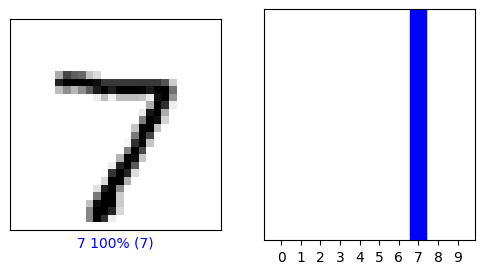

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

vemos que lo predice con el 100% de confianza, que si vemos en el array es un 0.9999 que termina redondeeándose a 1

hacemos este mismo proceso con más imágenes para ver cuales predice correctamente y cuáles no

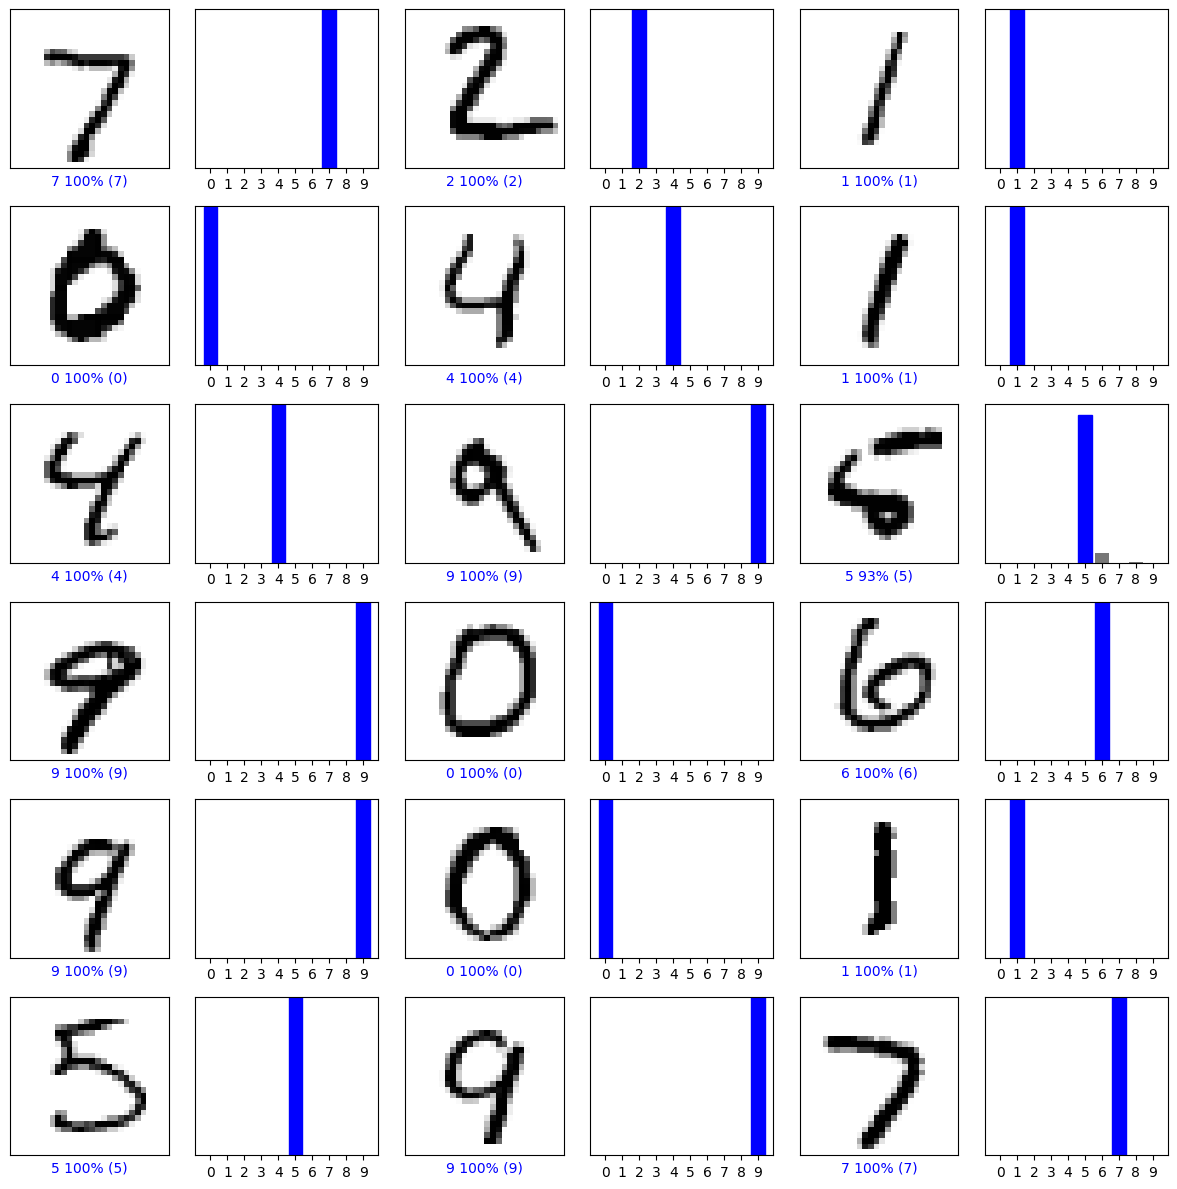

In [31]:
num_rows = 6
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

y vemos que casi todas las predijo con un 100% de confianza, nada másel 5 lo predijo con un 93% pero se entiende, hasta yo le dudé